In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt


In [2]:


#Define your block corners in order (lon, lat) or (x, y)
# Example: a simple rectangular block
area_coords = [
    (-110, 5),  # point 1
    (-90, 5),  # point 2
    (-90, -5),  # point 3
    (-110, -5),  # point 4
    (-110, 5)   # back to point 1 to close (optional but nice)
]

area_poly = Polygon(area_coords)

# 2️⃣ Put it into a GeoDataFrame
area_gdf = gpd.GeoDataFrame(
    {"name": ["block_1"]},
    geometry=[area_poly],
    crs="EPSG:4326"      # WGS84 lat/lon (what you’ve been using in class)
)


In [3]:
area_gdf

,name,geometry
0,block_1,"POLYGON ((-110 5, -90 5, -90 -5, -110 -5, -110..."


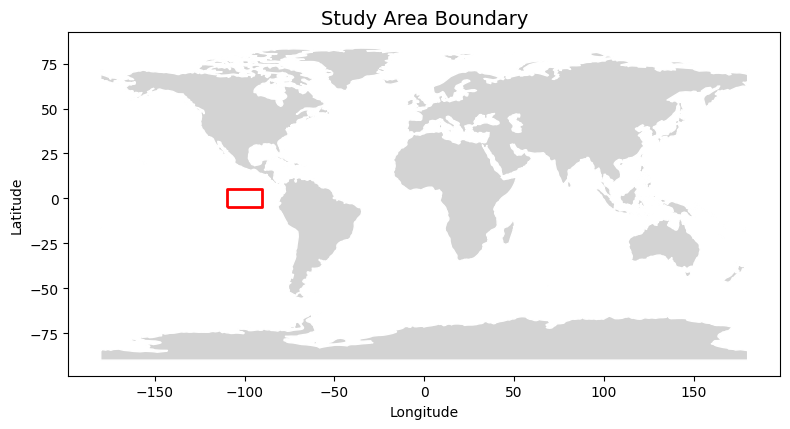

In [ ]:

# 1) Load world land polygons
world_path = geodatasets.get_path("naturalearth.land")
world = gpd.read_file(world_path)

# 2) Make sure CRSs match
if world.crs != area_gdf.crs:
    world = world.to_crs(area_gdf.crs)

# 3) Plot
fig, ax = plt.subplots(figsize=(8, 8))

world.plot(ax=ax, color="lightgray", edgecolor="white")
area_gdf.boundary.plot(ax=ax, edgecolor="red", linewidth=2)

ax.set_title("Study Area Boundary", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()



In [6]:
%store area_gdf

Stored 'area_gdf' (GeoDataFrame)
